## Importando as bibliotecas

In [2]:
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
import os
import kagglehub
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [3]:
# Download latest version
path = kagglehub.dataset_download("nehalbirla/vehicle-dataset-from-cardekho")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/vehicle-dataset-from-cardekho


In [4]:
print(os.listdir(path))

['car data.csv', 'car details v4.csv', 'CAR DETAILS FROM CAR DEKHO.csv', 'Car details v3.csv']


In [5]:
car_df = pd.read_csv("/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv")

In [6]:
car_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


## Análise Exploratória dos Dados (EDA)


In [7]:
car_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [8]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [9]:
car_df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [10]:
car_df['car_age'] = datetime.now().year - car_df['year']

In [11]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
 13  car_age        8128 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 889.1+ KB


## Separando marca e modelo do carro

In [12]:
car_df['brand'] = car_df['name'].apply(lambda x: x.split()[0])

In [13]:
car_df['name'] = car_df['name'].apply(lambda x: ' '.join(x.split()[1:]))

In [14]:
car_df['name']

,name
0,Swift Dzire VDI
1,Rapid 1.5 TDI Ambition
2,City 2017-2020 EXi
3,i20 Sportz Diesel
4,Swift VXI BSIII
...,...
8123,i20 Magna
8124,Verna CRDi SX
8125,Swift Dzire ZDi
8126,Indigo CR4


In [15]:
car_df.drop('year', axis = 1, inplace=True)

In [16]:
car_df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_age,brand
0,Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,11,Maruti
1,Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,11,Skoda
2,City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,19,Honda
3,i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,15,Hyundai
4,Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,18,Maruti


In [17]:
car_df['brand'].value_counts()

,count
brand,
Maruti,2448
Hyundai,1415
Mahindra,772
Tata,734
Toyota,488
Honda,467
Ford,397
Chevrolet,230
Renault,228


In [18]:
car_df.groupby('transmission')['brand'].value_counts()

transmission  brand        
Automatic     Maruti            173
              BMW               120
              Hyundai            99
              Toyota             93
              Honda              90
              Jaguar             71
              Volvo              67
              Mercedes-Benz      52
              Skoda              51
              Audi               40
              Mahindra           38
              Lexus              34
              Volkswagen         26
              Tata               19
              Ford               18
              Renault            13
              Nissan             11
              Jeep               10
              Chevrolet           8
              Land                6
              Isuzu               4
              Kia                 3
              MG                  3
              Datsun              1
Manual        Maruti           2275
              Hyundai          1316
              Mahindra          734
              Tata              715
              Toyota            395
              Ford              379
              Honda             377
              Chevrolet         222
              Renault           215
              Volkswagen        160
              Nissan             70
              Datsun             64
              Skoda              54
              Fiat               47
              Jeep               21
              Mitsubishi         14
              Force               6
              Ambassador          4
              Daewoo              3
              Mercedes-Benz       2
              Ashok               1
              Isuzu               1
              Kia                 1
              Opel                1
              Peugeot             1
Name: count, dtype: int64

In [19]:
car_df

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_age,brand
0,Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,11,Maruti
1,Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,11,Skoda
2,City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,19,Honda
3,i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,15,Hyundai
4,Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,18,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,i20 Magna,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,12,Hyundai
8124,Verna CRDi SX,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,18,Hyundai
8125,Swift Dzire ZDi,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0,16,Maruti
8126,Indigo CR4,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0,12,Tata


In [20]:
car_df['selling_price'].sort_values(ascending=False)

,selling_price
170,10000000
2938,7200000
4952,6523000
4950,6223000
4766,6000000
...,...
1926,31504
5965,31000
6776,30000
2145,30000


In [21]:
car_df['km_driven'].sort_values(ascending=False)

,km_driven
3486,2360457
1810,1500000
3508,577414
6673,500000
3641,500000
...,...
7429,1000
2963,1000
399,1000
7589,1000


In [22]:
car_df.drop_duplicates(inplace=True)

In [23]:
car_df.shape

(6926, 14)

In [24]:
car_df.drop('name', axis = 1, inplace = True)
car_df.drop('torque', axis = 1, inplace=True)

In [25]:
car_df

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age,brand
0,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0,11,Maruti
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0,11,Skoda
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0,19,Honda
3,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0,15,Hyundai
4,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0,18,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,5.0,12,Maruti
8122,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,5.0,11,Hyundai
8123,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0,12,Hyundai
8124,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0,18,Hyundai


## Tratando as colunas **mileage**, **engine** e **max_power**

In [26]:
bad_columns = ['mileage','engine','max_power']

car_df[bad_columns] = car_df[bad_columns].applymap(lambda x: str(x).split()[0])

/tmp/ipython-input-26-1916381420.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  car_df[bad_columns] = car_df[bad_columns].applymap(lambda x: str(x).split()[0])


In [27]:
car_df

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age,brand
0,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,5.0,11,Maruti
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,11,Skoda
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,5.0,19,Honda
3,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,5.0,15,Hyundai
4,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,5.0,18,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,260000,50000,Petrol,Individual,Manual,Second Owner,18.9,998,67.1,5.0,12,Maruti
8122,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396,88.73,5.0,11,Hyundai
8123,320000,110000,Petrol,Individual,Manual,First Owner,18.5,1197,82.85,5.0,12,Hyundai
8124,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8,1493,110,5.0,18,Hyundai


In [28]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6926 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  6926 non-null   int64  
 1   km_driven      6926 non-null   int64  
 2   fuel           6926 non-null   object 
 3   seller_type    6926 non-null   object 
 4   transmission   6926 non-null   object 
 5   owner          6926 non-null   object 
 6   mileage        6926 non-null   object 
 7   engine         6926 non-null   object 
 8   max_power      6926 non-null   object 
 9   seats          6718 non-null   float64
 10  car_age        6926 non-null   int64  
 11  brand          6926 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 703.4+ KB


In [29]:
car_df

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age,brand
0,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,5.0,11,Maruti
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,11,Skoda
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,5.0,19,Honda
3,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,5.0,15,Hyundai
4,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,5.0,18,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,260000,50000,Petrol,Individual,Manual,Second Owner,18.9,998,67.1,5.0,12,Maruti
8122,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396,88.73,5.0,11,Hyundai
8123,320000,110000,Petrol,Individual,Manual,First Owner,18.5,1197,82.85,5.0,12,Hyundai
8124,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8,1493,110,5.0,18,Hyundai


## Transformando colunas **object** em **float**

In [30]:
car_df['mileage'] = car_df['mileage'].apply(lambda x: float(x))
car_df['engine'] = car_df['engine'].apply(lambda x: float(x))

In [31]:
car_df['max_power'] = pd.to_numeric(car_df['max_power'], errors='coerce')

In [32]:
car_df.dropna(inplace=True)

In [33]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  6717 non-null   int64  
 1   km_driven      6717 non-null   int64  
 2   fuel           6717 non-null   object 
 3   seller_type    6717 non-null   object 
 4   transmission   6717 non-null   object 
 5   owner          6717 non-null   object 
 6   mileage        6717 non-null   float64
 7   engine         6717 non-null   float64
 8   max_power      6717 non-null   float64
 9   seats          6717 non-null   float64
 10  car_age        6717 non-null   int64  
 11  brand          6717 non-null   object 
dtypes: float64(4), int64(3), object(5)
memory usage: 682.2+ KB


## Visualização dos Dados

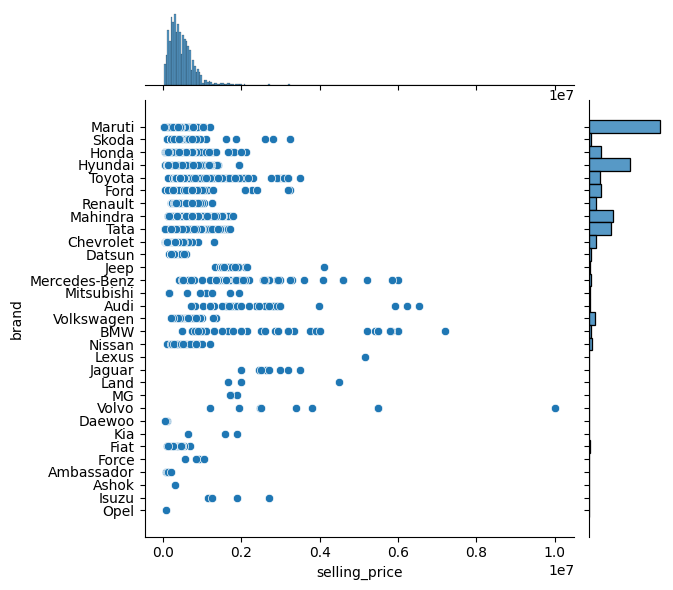

In [34]:
sns.jointplot(data = car_df, x='selling_price', y = 'brand')

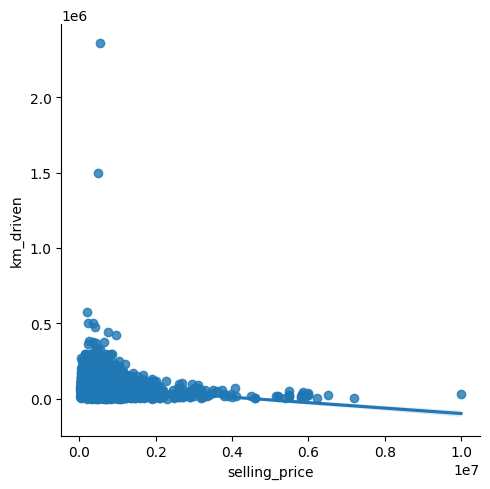

In [35]:
sns.lmplot(data = car_df, x = 'selling_price', y = 'km_driven')

## Insights : Correlação negativa entre **mileage** e **engine**, quanto mais cilindradas, menor tende a ser a quilometragem do carro (carro mais novo); Correlação positiva sutil entre **selling_price** e **max_power**, quanto mais cavalos tiver o mato, maior o preço do carro.

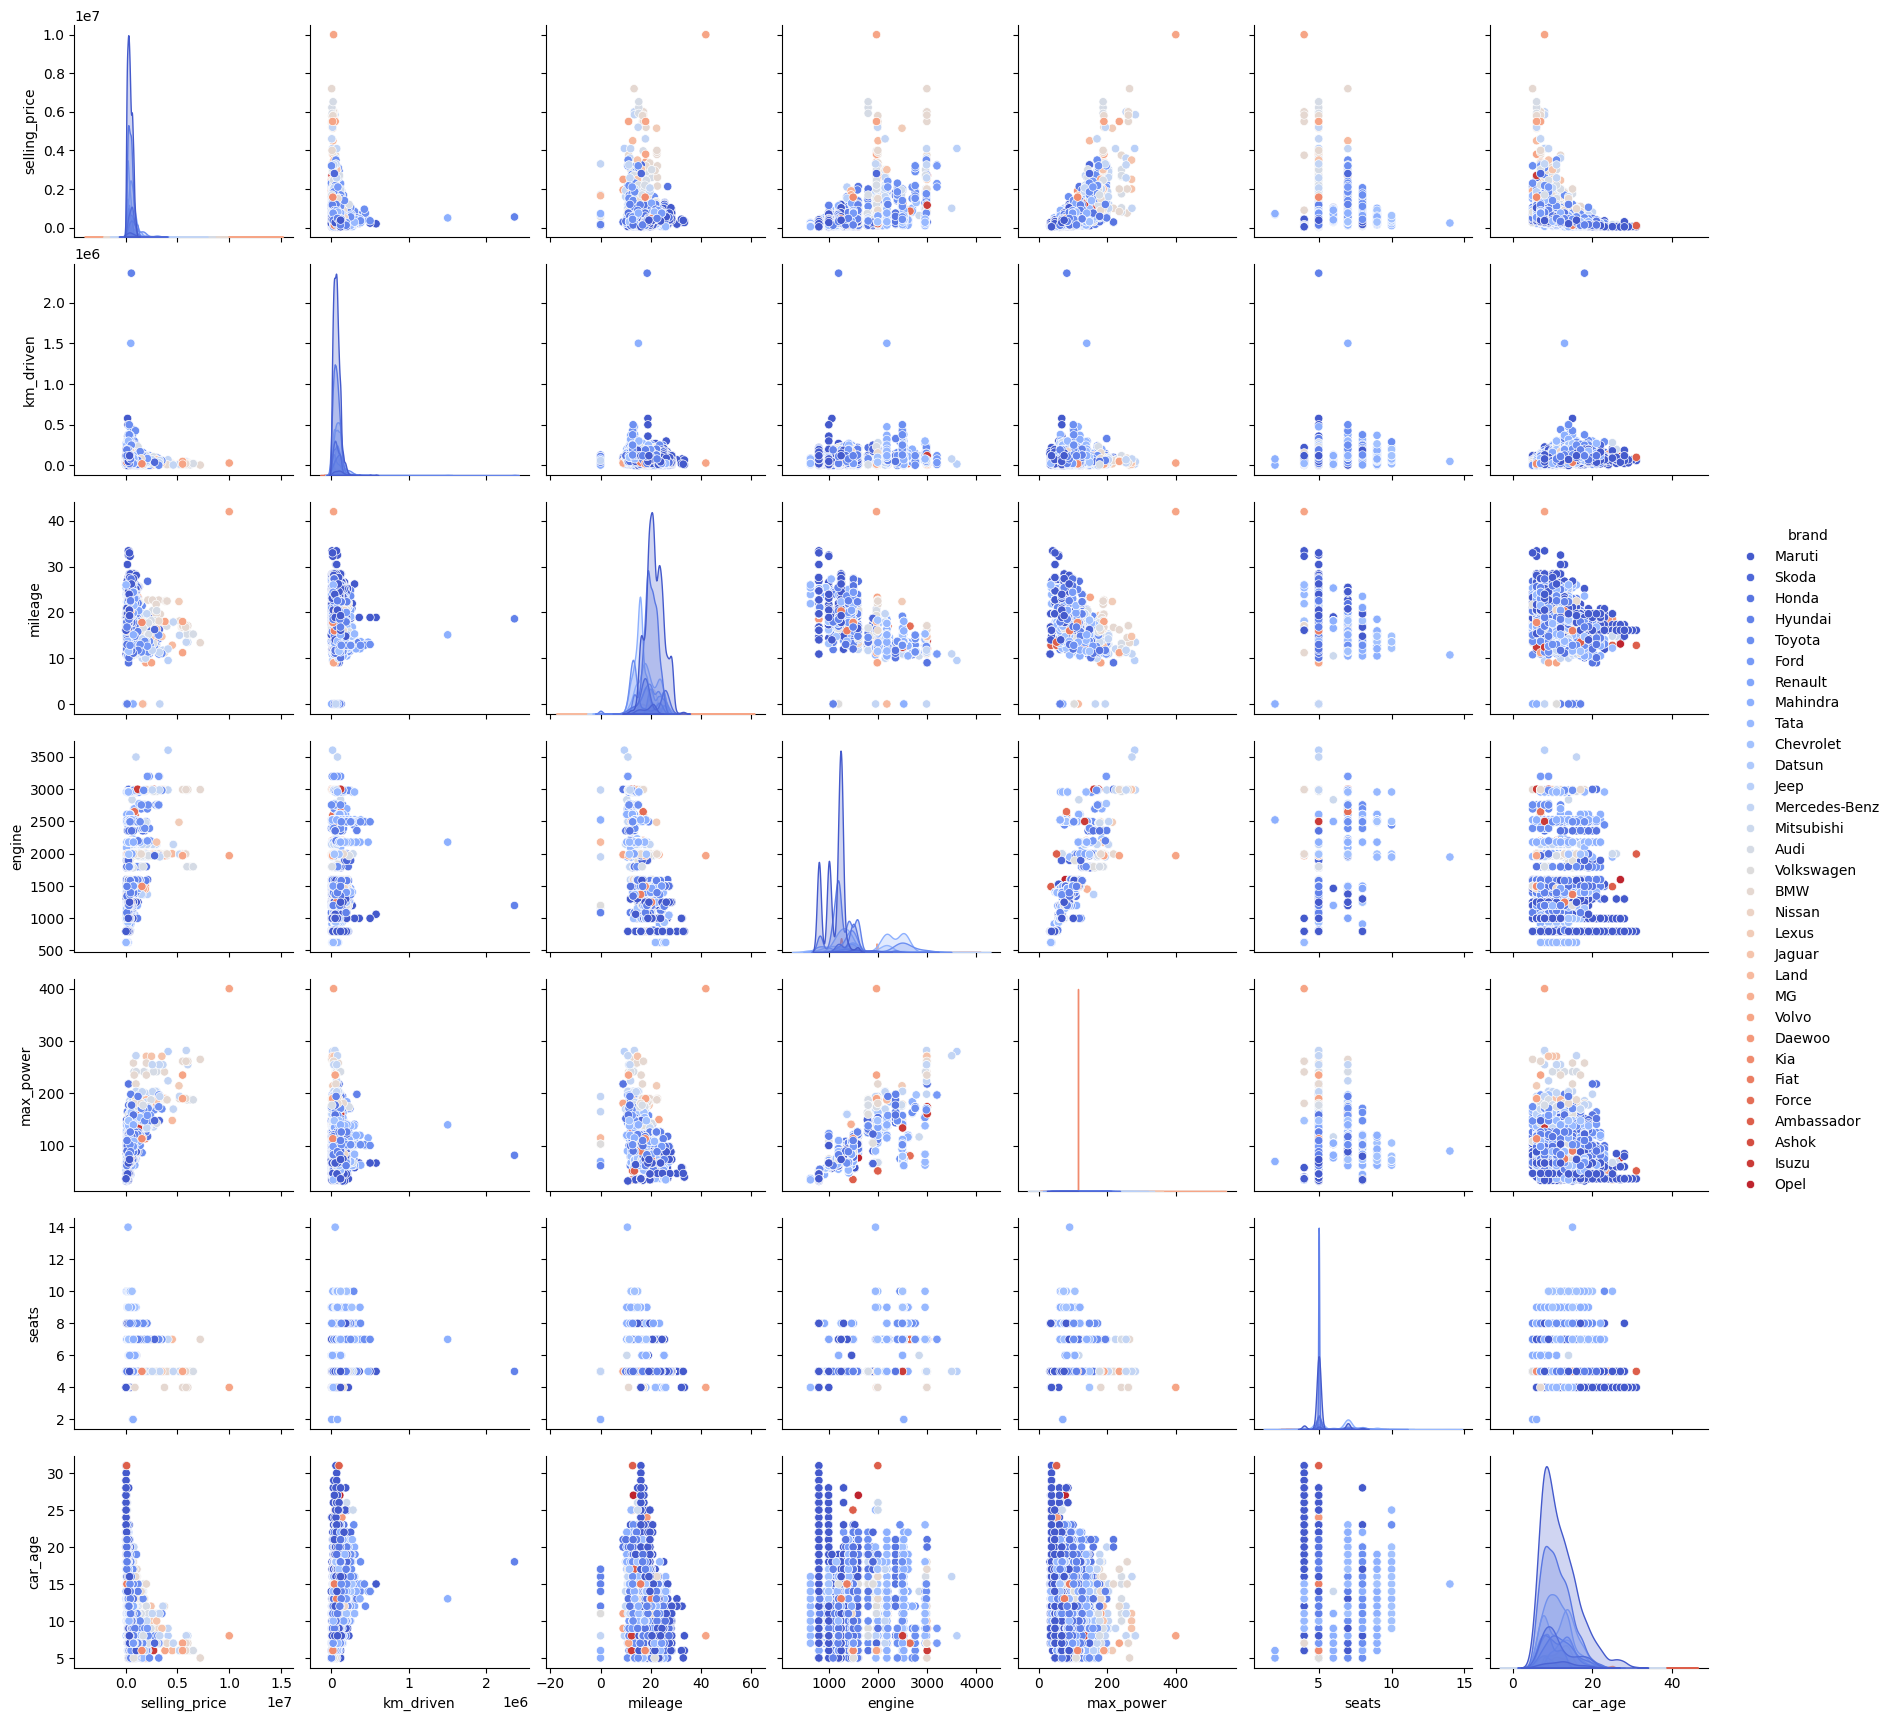

In [36]:
sns.pairplot(data = car_df, hue='brand', palette='coolwarm')

## Novamente conseguimos identificar a forte correlação entre **max_power** e **engine** e entre **max_power** e **selling_price**. A novidade agora é que também notamos a presença de uma forte correlação entre **seats** e **engine**, ou seja, motores com bastante cilindradas tendem a ter mais assentos, o que faz sentido, já que carros com mais assentos tendem a ser mais pesados, precisando ter motores mais fortes.

<Axes: >

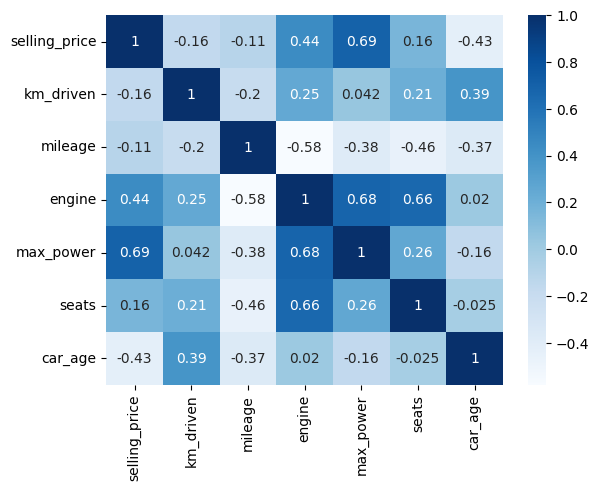

In [37]:
numeric_df = car_df.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(),annot=True,cmap='Blues')

## Visualizando os Outliers

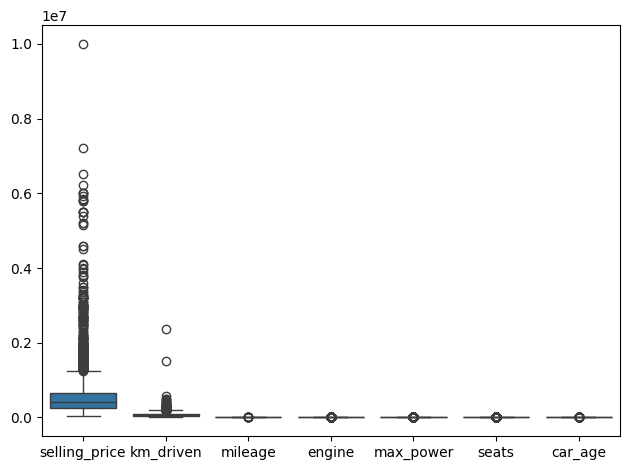

In [38]:
sns.boxplot(data=car_df)
plt.tight_layout()
plt.show()

In [39]:
car_df

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age,brand
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11,Maruti
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11,Skoda
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19,Honda
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15,Hyundai
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5.0,12,Maruti
8122,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0,11,Hyundai
8123,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,12,Hyundai
8124,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,18,Hyundai


## **Removendo Outliers**

In [40]:
Q1 = car_df['km_driven'].quantile(0.25)
Q3 = car_df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

car_df = car_df[(car_df['km_driven'] >= limite_inferior) & (car_df['km_driven'] <= limite_superior)]

In [41]:
Q1 = car_df['selling_price'].quantile(0.25)
Q3 = car_df['selling_price'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

car_df = car_df[(car_df['selling_price'] >= limite_inferior) & (car_df['selling_price'] <= limite_superior)]

# Aplicando Feature Scaling nas colunas numéricas

In [42]:
scaler = StandardScaler()

features = ['km_driven', 'car_age', 'mileage', 'engine', 'max_power', 'seats']

car_df[features] = scaler.fit_transform(car_df[features])

In [43]:
X = car_df.drop('selling_price', axis=1)
y = car_df['selling_price']

X = pd.get_dummies(X, drop_first=True)

## Separando Treino e Teste

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## **Regressão Linear**

In [45]:
lin_reg = LinearRegression()

cv_scores = cross_val_score(lin_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_scores)
print("RMSEs por fold:", rmse_scores)
print("RMSE médio:", rmse_scores.mean())

lin_reg.fit(X_train, y_train)

RMSEs por fold: [123487.42433644 119279.41596372 128027.4697537  122055.42748646
 125265.81021206]
RMSE médio: 123623.10955047666


LinearRegression()

In [46]:
y_pred = lin_reg.predict(X_test)


rmse_original = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE no valor original:", rmse_original)

RMSE no valor original: 121765.33047569625


## **Decision Tree Regressor**

In [47]:
tree_regressor = DecisionTreeRegressor(random_state=42)

dt_cv_scores = cross_val_score(tree_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
dt_rmse_cv = np.sqrt(-dt_cv_scores)
print("Decision Tree RMSEs por fold:", dt_rmse_cv)
print("Decision Tree RMSE médio:", dt_rmse_cv.mean())

tree_regressor.fit(X_train, y_train)

Decision Tree RMSEs por fold: [113517.93081041 114440.08278145 121303.29059495 118512.61437228
 127712.21046514]
Decision Tree RMSE médio: 119097.22580484618


DecisionTreeRegressor(random_state=42)

In [48]:
y_pred = tree_regressor.predict(X_test)

rmse_original = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE no valor original:", rmse_original)

RMSE no valor original: 112861.05166051396


## **Random Forest**

In [49]:
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

In [50]:
# Cross-validation
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rf_rmse_cv = np.sqrt(-rf_cv_scores)
print("\nRandom Forest RMSEs por fold:", rf_rmse_cv)
print("Random Forest RMSE médio:", rf_rmse_cv.mean())

rf_model.fit(X_train, y_train)


Random Forest RMSEs por fold: [81894.84333532 89028.20971694 91581.66322826 88567.64835841
 96711.77689418]
Random Forest RMSE médio: 89556.82830662113


RandomForestRegressor(random_state=42)

In [51]:
rf_preds = rf_model.predict(X_test)

rf_rmse_original = np.sqrt(mean_squared_error(y_test, rf_preds))
print("Random Forest RMSE no valor original:", rf_rmse_original)

Random Forest RMSE no valor original: 87673.58414705278


## Tunando o Random Forest Regressor

In [52]:
#Parâmetros para testar no GridSearch
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Melhores hiperparâmetros:", grid_search.best_params_)

# Avaliar no teste
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

rmse_final = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE final no valor original:", rmse_final)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
414 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py"

Melhores hiperparâmetros: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
RMSE final no valor original: 84081.85112504744


In [53]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nFinal Model Performance on Test Set:")
print(f"RMSE %: {rmse/y_test.mean()*100:.2f}")
print(f"R² Score: {r2:.2f}")


Final Model Performance on Test Set:
RMSE %: 19.00
R² Score: 0.89


## **XGBoost**

In [54]:
xgb_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=5)

In [55]:
# 7. Cross-validation
xgb_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
xgb_rmse_cv = np.sqrt(-xgb_cv_scores)
print("XGBoost RMSEs por fold:", xgb_rmse_cv)
print("XGBoost RMSE médio:", xgb_rmse_cv.mean())

# 8. Treinamento final
xgb_model.fit(X_train, y_train)

XGBoost RMSEs por fold: [79335.59624784 85460.41104511 90463.29819325 84781.58894477
 94061.59275709]
XGBoost RMSE médio: 86820.49743761105


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [56]:
y_pred= xgb_model.predict(X_test)

rmse_final = np.sqrt(mean_squared_error(y_test, y_pred))
print("XGBoost RMSE no valor original:", rmse_final)

XGBoost RMSE no valor original: 84036.74320200659


## Tunando o XGBoost

In [57]:
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# 7. Instanciar modelo base
xgb = XGBRegressor(random_state=42)

# 8. Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=30,
    scoring='neg_root_mean_squared_error',  # usa RMSE diretamente
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# 9. Treinar RandomizedSearch com y_log
random_search.fit(X_train, y_train)

# 10. Melhor modelo
best_xgb = random_search.best_estimator_
print("Melhores hiperparâmetros:", random_search.best_params_)

# 11. Fazer previsões no teste (no espaço log)
y_pred = best_xgb.predict(X_test)

rmse_final = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE final no valor original:", rmse_final)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Melhores hiperparâmetros: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
RMSE final no valor original: 81062.10478392478


## Plotando a diferença (Previsto x Real)

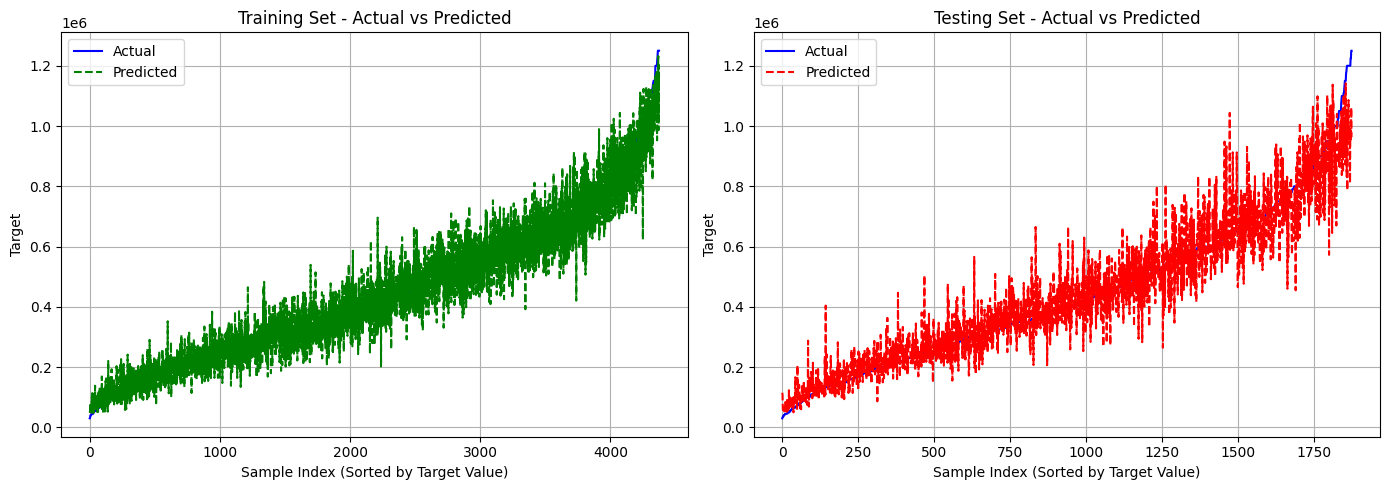

In [58]:
y_train_pred = best_xgb.predict(X_train)
y_test_pred = best_xgb.predict(X_test)

train_sort_idx = np.argsort(y_train.values)
test_sort_idx = np.argsort(y_test.values)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(y_train.values[train_sort_idx], label='Actual', color='blue')
plt.plot(y_train_pred[train_sort_idx], label='Predicted', color='green', linestyle='--')
plt.title("Training Set - Actual vs Predicted")
plt.xlabel("Sample Index (Sorted by Target Value)")
plt.ylabel("Target")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(y_test.values[test_sort_idx], label='Actual', color='blue')
plt.plot(y_test_pred[test_sort_idx], label='Predicted', color='red', linestyle='--')
plt.title("Testing Set - Actual vs Predicted")
plt.xlabel("Sample Index (Sorted by Target Value)")
plt.ylabel("Target")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()